In [1]:
# -----------------------------
# Task 1: Load & Explore Dataset
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme()

# 1. Load dataset with better error handling
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

try:
    df = pd.read_csv(url, header=None, names=columns)
    print("✅ Iris dataset loaded successfully from UCI")
except Exception as e:
    print("⚠️ Could not fetch from UCI:", e)
    # Use seaborn's built-in iris dataset instead of relying on a local file
    print("Loading iris dataset from seaborn instead...")
    df = sns.load_dataset("iris")
    # Rename columns to match our desired format if needed
    df = df.rename(columns={
        "sepal_length": "sepal_length",
        "sepal_width": "sepal_width", 
        "petal_length": "petal_length",
        "petal_width": "petal_width",
        "species": "species"
    })

# Inspect the first few rows
df.head()

✅ Iris dataset loaded successfully from UCI


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# -----------------------------
# Task 1: Explore Structure & Clean
# -----------------------------
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Drop empty rows (if any)
df = df.dropna(how="all")

# Fill missing numeric values with column means (not needed for Iris, but good practice)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Drop rows with missing species
df = df[df["species"].notna()]

# Ensure species is categorical
df["species"] = df["species"].astype("category")

print("\n✅ Cleaned dataset. Shape:", df.shape)
df.head()




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

--- Missing Values ---
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

✅ Cleaned dataset. Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# -----------------------------
# Task 2: Basic Data Analysis
# -----------------------------
print("\n--- Basic Statistics ---")
display(df.describe())

print("\n--- Mean values grouped by species ---")
group_means = df.groupby("species").mean(numeric_only=True)
display(group_means)

# Example finding
largest_petal_species = group_means["petal_length"].idxmax()
print(f"\n📌 Interesting Finding: '{largest_petal_species}' has the largest average petal length.")



--- Basic Statistics ---


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



--- Mean values grouped by species ---


C:\Users\FAITH\AppData\Local\Temp\ipykernel_26904\1908488474.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby("species").mean(numeric_only=True)


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026



📌 Interesting Finding: 'Iris-virginica' has the largest average petal length.


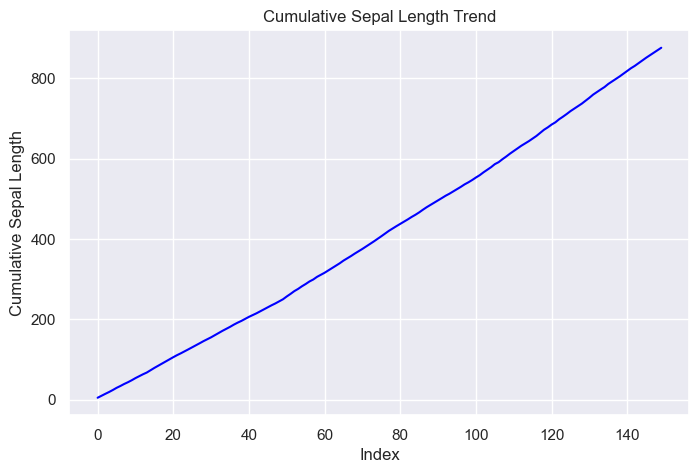

C:\Users\FAITH\AppData\Local\Temp\ipykernel_26904\2649280925.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="petal_length", data=df, estimator=np.mean, palette="Set2")


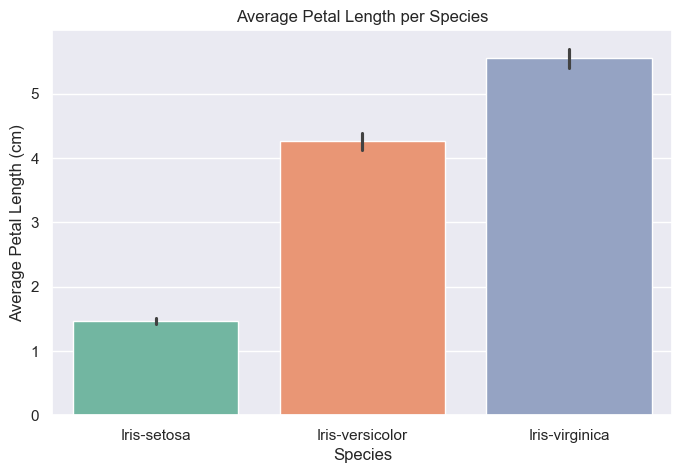

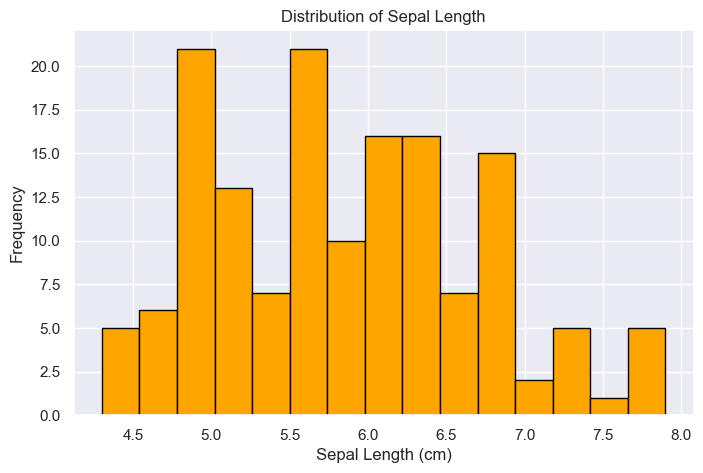

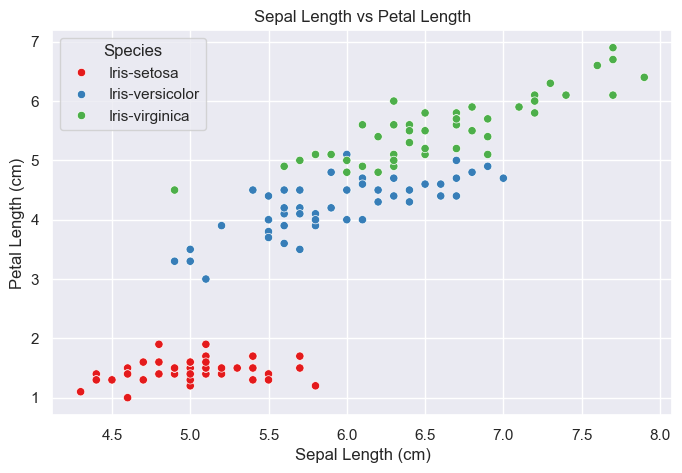

In [4]:
# -----------------------------
# Task 3: Data Visualization
# -----------------------------

# 1. Line Chart (example: cumulative sepal length trend)
plt.figure(figsize=(8,5))
df["sepal_length"].cumsum().plot(kind="line", color="blue")
plt.title("Cumulative Sepal Length Trend")
plt.xlabel("Index")
plt.ylabel("Cumulative Sepal Length")
plt.show()

# 2. Bar Chart: Average petal length per species
plt.figure(figsize=(8,5))
sns.barplot(x="species", y="petal_length", data=df, estimator=np.mean, palette="Set2")
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram: Sepal Length Distribution
plt.figure(figsize=(8,5))
plt.hist(df["sepal_length"], bins=15, color="orange", edgecolor="black")
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Sepal Length vs Petal Length
plt.figure(figsize=(8,5))
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df, palette="Set1")
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
